# 분석 시작

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

art = pd.read_csv("data/articles_processed.csv")                 # 상품 메타데이터
cust = pd.read_csv("data/customer_processed.csv")               # 고객 메타데이터
total_revenue = pd.read_csv("data/total_revenue.csv")       # 매출 데이터

In [64]:
art.columns

Index(['Article_Id', 'Product_Code', 'Prod_Name', 'Product_Type_Info',
       'Product_Group_Name', 'Graphical_Appearance_Info',
       'Perceived_Colour_Master_Info', 'Department_Info', 'Index_Info',
       'Index_Group_Info', 'Section_Info', 'Garment_Group_Info'],
      dtype='str')

In [65]:
cust.columns

Index(['Customer_Id', 'Fn', 'Active', 'Club_Member_Status',
       'Fashion_News_Frequency', 'Age', 'Age_Group'],
      dtype='str')

In [66]:
total_revenue.columns

Index(['T_Dat', 'Customer_Id', 'Article_Id', 'Revenue', 'Sales_Channel_Id',
       'Month', 'Year_Month', 'Month_Day', 'Total_Revenue', 'Revenue_Group'],
      dtype='str')

In [67]:
# # ---------------------------------------------------------------------
# 분석용 통합 테이블 거래+고객+상품
# 볼수 있는 데이터
# ==  거래(매출, 채널, 날짜, 고객그룹) + 고객속성 + 상품속성
# 가입한 사람이 아닌 소비한 고객을 골라야 하기 때문에 inner 사용
# ---------------------------------------------------------------------

analysis_master = (
    total_revenue
    .merge(cust, on="Customer_Id", how="inner")
    .merge(art, on="Article_Id", how="inner")
)
analysis_master.shape

(804149, 27)

In [68]:
pd.set_option('display.max_columns', None)
analysis_master.head()

,T_Dat,Customer_Id,Article_Id,Revenue,Sales_Channel_Id,Month,Year_Month,Month_Day,Total_Revenue,Revenue_Group,Fn,Active,Club_Member_Status,Fashion_News_Frequency,Age,Age_Group,Product_Code,Prod_Name,Product_Type_Info,Product_Group_Name,Graphical_Appearance_Info,Perceived_Colour_Master_Info,Department_Info,Index_Info,Index_Group_Info,Section_Info,Garment_Group_Info
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2,11,2019-11,11-05,0.227186,top_20,True,True,Active,Regularly,51,50s,698328,ZEBRA CF TVP,Sweater (252),Garment Upper body,Placement print (1010014),Blue (2),Tops Fancy Jersey (1640),Divided (D),Divided (2),Divided Collection (53),Jersey Fancy (1005)
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,2,5,2019-05,05-22,0.067746,middle,False,False,Active,NaN,28,20s,760597,BUBBLE WRAP TOP,Top (254),Garment Upper body,Stripe (1010017),White (9),Jersey (1660),Ladieswear (A),Ladieswear (1),Womens Casual (6),Jersey Fancy (1005)
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,2,5,2019-05,05-10,0.016932,bottom_20,True,True,Active,Regularly,37,30s,488561,Teddy jogger.,Shorts (274),Garment Lower body,Chambray (1010024),Blue (2),Shorts (5658),Menswear (F),Menswear (3),Contemporary Casual (21),Shorts (1025)
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,682771001,0.033881,2,8,2019-08,08-26,0.033881,middle,False,False,Active,NaN,19,10s,682771,Yuki shopper,Bag (66),Accessories,Solid (1010016),Black (5),Bags (3209),Ladies Accessories (C),Ladieswear (1),Womens Big accessories (65),Accessories (1019)
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,1,8,2019-08,08-10,0.028627,middle,False,False,Active,NaN,35,30s,742400,1pk Sportsock,Socks (302),Socks & Tights,All over pattern (1010001),White (9),Socks Wall (5999),Menswear (F),Menswear (3),Men Underwear (26),Socks and Tights (1021)


In [69]:
analysis_master['Age'].value_counts()

Age
25    40760
26    40298
27    38598
24    37837
28    34416
      ...  
76      289
77      223
78      160
79      141
16       23
Name: count, Length: 64, dtype: int64

In [70]:
analysis_master['Age'].isna().sum()

np.int64(0)

In [71]:
analysis_master['Age'].describe()

count    804149.000000
mean         36.303306
std          12.954593
min          16.000000
25%          26.000000
50%          32.000000
75%          48.000000
max          79.000000
Name: Age, dtype: float64

In [72]:
analysis_master.columns

Index(['T_Dat', 'Customer_Id', 'Article_Id', 'Revenue', 'Sales_Channel_Id',
       'Month', 'Year_Month', 'Month_Day', 'Total_Revenue', 'Revenue_Group',
       'Fn', 'Active', 'Club_Member_Status', 'Fashion_News_Frequency', 'Age',
       'Age_Group', 'Product_Code', 'Prod_Name', 'Product_Type_Info',
       'Product_Group_Name', 'Graphical_Appearance_Info',
       'Perceived_Colour_Master_Info', 'Department_Info', 'Index_Info',
       'Index_Group_Info', 'Section_Info', 'Garment_Group_Info'],
      dtype='str')

- 없는 컬럼
    - Day_name

- 있는 컬럼
    - Year_Month == 년/월
    - Month_Day == 월/일
    - Total_Revenue == 고객의 총 구매가격

# 다른 이름의 컬럼
    - Price = Revenue
    - Segment= Revenue_Group

In [73]:
# 실제 분석용 데이터프레임
analysis_christmas = analysis_master[
    [
        # 키
        "Customer_Id", "Article_Id",
        # 시간
        "Year_Month", "Month", "Month_Day",
        # 거래
        "Revenue", "Sales_Channel_Id",
        # 고객
        "Age_Group", "Revenue_Group", "Club_Member_Status", "Fn", "Active", # FN: 뉴스 구독, club_member_status: 팬클럽 가입여부
        # 상품 특성 (크리스마스 분석 핵심)
        "Product_Group_Name", "Garment_Group_Info", "Product_Type_Info",
        "Graphical_Appearance_Info",                 # 패턴
        "Perceived_Colour_Master_Info",    # (색상은 조원 담당이지만 보조로 남겨도 됨)
        "Section_Info", "Index_Group_Info",

    ]
].copy()

## 연령대별 윈터시즌 vs 비윈터시즌 비교

> 주요 컬럼: 'Age_Group', 'Customer_Id', 'Month', 'Revenue'  

> 시각화 목표: 연령대별 총 매출, 연령대별 객단가?, 연령대별 온라인 비중?

### 사전 준비

In [74]:
age_df = analysis_master.copy()

In [75]:
age_df['Is_Winter'] = age_df['Month'].isin([11, 12, 1, 2])

In [76]:
age_df.head()

,T_Dat,Customer_Id,Article_Id,Revenue,Sales_Channel_Id,Month,Year_Month,Month_Day,Total_Revenue,Revenue_Group,Fn,Active,Club_Member_Status,Fashion_News_Frequency,Age,Age_Group,Product_Code,Prod_Name,Product_Type_Info,Product_Group_Name,Graphical_Appearance_Info,Perceived_Colour_Master_Info,Department_Info,Index_Info,Index_Group_Info,Section_Info,Garment_Group_Info,Is_Winter
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2,11,2019-11,11-05,0.227186,top_20,True,True,Active,Regularly,51,50s,698328,ZEBRA CF TVP,Sweater (252),Garment Upper body,Placement print (1010014),Blue (2),Tops Fancy Jersey (1640),Divided (D),Divided (2),Divided Collection (53),Jersey Fancy (1005),True
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,2,5,2019-05,05-22,0.067746,middle,False,False,Active,NaN,28,20s,760597,BUBBLE WRAP TOP,Top (254),Garment Upper body,Stripe (1010017),White (9),Jersey (1660),Ladieswear (A),Ladieswear (1),Womens Casual (6),Jersey Fancy (1005),False
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,2,5,2019-05,05-10,0.016932,bottom_20,True,True,Active,Regularly,37,30s,488561,Teddy jogger.,Shorts (274),Garment Lower body,Chambray (1010024),Blue (2),Shorts (5658),Menswear (F),Menswear (3),Contemporary Casual (21),Shorts (1025),False
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,682771001,0.033881,2,8,2019-08,08-26,0.033881,middle,False,False,Active,NaN,19,10s,682771,Yuki shopper,Bag (66),Accessories,Solid (1010016),Black (5),Bags (3209),Ladies Accessories (C),Ladieswear (1),Womens Big accessories (65),Accessories (1019),False
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,1,8,2019-08,08-10,0.028627,middle,False,False,Active,NaN,35,30s,742400,1pk Sportsock,Socks (302),Socks & Tights,All over pattern (1010001),White (9),Socks Wall (5999),Menswear (F),Menswear (3),Men Underwear (26),Socks and Tights (1021),False


In [77]:
winter_df = age_df[age_df['Is_Winter']].copy()

In [78]:
winter_df.head()

,T_Dat,Customer_Id,Article_Id,Revenue,Sales_Channel_Id,Month,Year_Month,Month_Day,Total_Revenue,Revenue_Group,Fn,Active,Club_Member_Status,Fashion_News_Frequency,Age,Age_Group,Product_Code,Prod_Name,Product_Type_Info,Product_Group_Name,Graphical_Appearance_Info,Perceived_Colour_Master_Info,Department_Info,Index_Info,Index_Group_Info,Section_Info,Garment_Group_Info,Is_Winter
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2,11,2019-11,11-05,0.227186,top_20,True,True,Active,Regularly,51,50s,698328,ZEBRA CF TVP,Sweater (252),Garment Upper body,Placement print (1010014),Blue (2),Tops Fancy Jersey (1640),Divided (D),Divided (2),Divided Collection (53),Jersey Fancy (1005),True
7,2019-02-22,4c8c418805d81bd1d25d77659f227ac5570b154172ff8c...,651685004,0.016932,2,2,2019-02,02-22,0.016932,bottom_20,False,False,Active,NaN,26,20s,651685,Hazel playsuit,Trousers (272),Garment Lower body,All over pattern (1010001),Red (18),Trouser (1722),Ladieswear (A),Ladieswear (1),Womens Everyday Collection (15),Trousers (1009),True
8,2019-02-22,0e5b7fc9a02c8d44a86575a66b571587fa5178f0705c7b...,751941002,0.036000,2,2,2019-02,02-22,0.172373,top_20,False,False,Active,NaN,30,30s,751941,Bonita WH tapered,Trousers (272),Garment Lower body,Solid (1010016),Khaki green (20),Trouser (1722),Ladieswear (A),Ladieswear (1),Womens Everyday Collection (15),Trousers (1009),True
9,2019-12-06,be3af45f57ca28c62d67fc7ae70b93c0a5bf9ba67e5793...,836327003,0.042356,2,12,2019-12,12-06,0.042356,middle,True,True,Active,Regularly,48,40s,836327,Chia Seamless HW Tights,Leggings/Tights (273),Garment Lower body,Solid (1010016),Black (5),Ladies Sport Bottoms (8310),Sport (S),Sport (26),Ladies H&M Sport (5),Jersey Fancy (1005),True
11,2019-11-08,5e7680cc75a00c44a7cc3b507404319c4409b95c458741...,749400009,0.016932,2,11,2019-11,11-08,0.425237,top_20,False,False,Active,NaN,28,20s,749400,Tory price tee,T-shirt (255),Garment Upper body,Solid (1010016),Black (5),Ladies Sport Bras (8316),Sport (S),Sport (26),Ladies H&M Sport (5),Jersey Fancy (1005),True


In [79]:
winter_df.shape

(232210, 28)

### 윈터시즌 vs 비윈터시즌 연령대 판매량 비교

In [82]:
age_season_cnt = (age_df.groupby(["Is_Winter", "Age_Group"])['T_Dat'].size().reset_index())
age_season_cnt

,Is_Winter,Age_Group,T_Dat
0,False,10s,9798
1,False,20s,235139
2,False,30s,115424
3,False,40s,89307
4,False,50s,96427
5,False,60s+,25844
6,True,10s,3908
7,True,20s,94456
8,True,30s,48520
9,True,40s,36107


In [83]:
pivot_cnt = age_season_cnt.pivot(index="Age_Group", columns="Is_Winter", values="T_Dat")
pivot_cnt

Is_Winter,False,True
Age_Group,,
10s,9798,3908
20s,235139,94456
30s,115424,48520
40s,89307,36107
50s,96427,38126
60s+,25844,11093


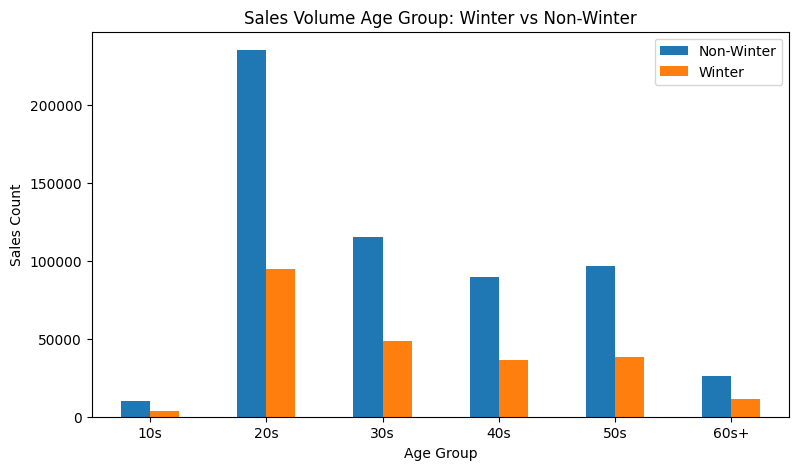

In [84]:
pivot_cnt.plot(kind="bar", figsize=(9,5))
plt.title("Sales Volume Age Group: Winter vs Non-Winter")
plt.xlabel("Age Group")
plt.ylabel("Sales Count")
plt.legend(["Non-Winter", "Winter"])
plt.xticks(rotation=0)
plt.show()

#### 비율로 감소 정도 나타내기

In [85]:
pivot_cnt["change_pct"] = ((pivot_cnt[True]-pivot_cnt[False])/pivot_cnt[False]*100)
pivot_cnt

Is_Winter,False,True,change_pct
Age_Group,,,
10s,9798,3908,-60.114309
20s,235139,94456,-59.829718
30s,115424,48520,-57.963682
40s,89307,36107,-59.569799
50s,96427,38126,-60.461282
60s+,25844,11093,-57.077078


In [86]:
# 감소율 기준 정렬
pivot_cnt_sorted = pivot_cnt.sort_values("change_pct")
pivot_cnt_sorted

Is_Winter,False,True,change_pct
Age_Group,,,
50s,96427,38126,-60.461282
10s,9798,3908,-60.114309
20s,235139,94456,-59.829718
40s,89307,36107,-59.569799
30s,115424,48520,-57.963682
60s+,25844,11093,-57.077078


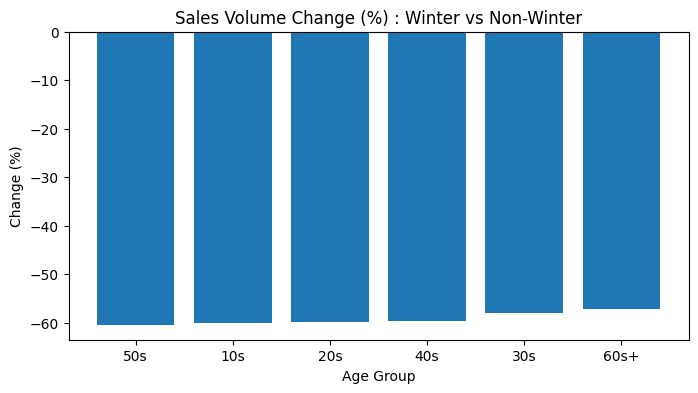

In [87]:
plt.figure(figsize=(8,4))
plt.bar(pivot_cnt_sorted.index, pivot_cnt_sorted["change_pct"])
plt.axhline(0, color="gray")
plt.title("Sales Volume Change (%) : Winter vs Non-Winter")
plt.xlabel("Age Group")
plt.ylabel("Change (%)")
plt.show()

감소율이 다 비슷해서 눈에 띄지 않음 -> 스케일 변경 및 평균 감소율 같이 그려서 잘 보이도록 수정

In [89]:
# 평균 감소율
mean_change = pivot_cnt["change_pct"].mean()
mean_change

np.float64(-59.16931108617615)

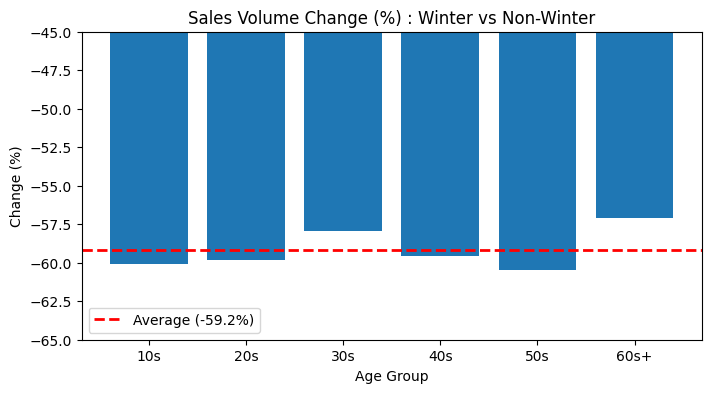

In [90]:
plt.figure(figsize=(8,4))
plt.bar(pivot_cnt.index, pivot_cnt["change_pct"])

# 평균선 추가
plt.axhline(mean_change, color="red", linestyle="--", linewidth=2, label=f"Average ({mean_change:.1f}%)")

#스케일 조정
plt.ylim(-65, -45)
plt.title("Sales Volume Change (%) : Winter vs Non-Winter")
plt.xlabel("Age Group")
plt.ylabel("Change (%)")
plt.legend()
plt.show()

> 윈터 시즌 판매량 감소는 전 연령대에서 공통적으로 발생했으며, 평균 약 -59% 수준으로 감소 폭이 매우 유사하다.  
-> 윈터 시즌 판매량 감소는 연령대 특성보다는 시즌 영향이 강함?  
그래도 그 중에서 60대+, 30대는 그나마 방어가 조금 된다?

### (Sub)
### 판매량은 비슷하게 줄었는데, 매출은 연령대별로 감소폭 차이가 있을까? -> 윈터시즌 vs 비윈터시즌 연령대 매출 비교

In [94]:
age_season_revenue = (age_df.groupby(["Is_Winter", "Age_Group"])['Revenue'].mean().reset_index())
age_season_revenue

,Is_Winter,Age_Group,Revenue
0,False,10s,0.022846
1,False,20s,0.026065
2,False,30s,0.026715
3,False,40s,0.026187
4,False,50s,0.027557
5,False,60s+,0.028164
6,True,10s,0.024603
7,True,20s,0.026920
8,True,30s,0.026964
9,True,40s,0.026768


In [95]:
pivot_revenue = age_season_revenue.pivot(index="Age_Group", columns="Is_Winter", values="Revenue")
pivot_revenue

Is_Winter,False,True
Age_Group,,
10s,0.022846,0.024603
20s,0.026065,0.026920
30s,0.026715,0.026964
40s,0.026187,0.026768
50s,0.027557,0.028570
60s+,0.028164,0.029310


In [102]:
pivot_revenue['diff'] = pivot_revenue[True] - pivot_revenue[False]
pivot_revenue

Is_Winter,False,True,revenue_change_pct,diff
Age_Group,,,,
10s,0.022846,0.024603,1.793628e-05,0.001757
20s,0.026065,0.026920,3.637189e-07,0.000855
30s,0.026715,0.026964,2.149589e-07,0.000248
40s,0.026187,0.026768,6.501725e-07,0.000581
50s,0.027557,0.028570,1.051368e-06,0.001014
60s+,0.028164,0.029310,4.433805e-06,0.001146


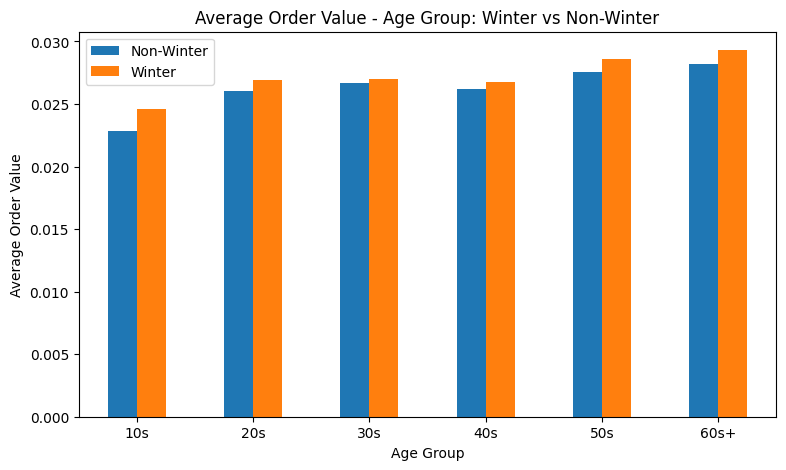

In [96]:
pivot_revenue.plot(kind="bar", figsize=(9,5))
plt.title("Average Order Value - Age Group: Winter vs Non-Winter")
plt.xlabel("Age Group")
plt.ylabel("Average Order Value")
plt.legend(["Non-Winter", "Winter"])
plt.xticks(rotation=0)
plt.show()

#### 비율로 객단가 증가 정도 나타내기

In [97]:
pivot_revenue["revenue_change_pct"] = ((pivot_revenue[True]-pivot_revenue[False])/pivot_cnt[False]*100)
pivot_revenue

Is_Winter,False,True,revenue_change_pct
Age_Group,,,
10s,0.022846,0.024603,1.793628e-05
20s,0.026065,0.026920,3.637189e-07
30s,0.026715,0.026964,2.149589e-07
40s,0.026187,0.026768,6.501725e-07
50s,0.027557,0.028570,1.051368e-06
60s+,0.028164,0.029310,4.433805e-06


In [98]:
# 감소율 기준 정렬
pivot_revenue_sorted = pivot_revenue.sort_values("revenue_change_pct")
pivot_revenue_sorted

Is_Winter,False,True,revenue_change_pct
Age_Group,,,
30s,0.026715,0.026964,2.149589e-07
20s,0.026065,0.026920,3.637189e-07
40s,0.026187,0.026768,6.501725e-07
50s,0.027557,0.028570,1.051368e-06
60s+,0.028164,0.029310,4.433805e-06
10s,0.022846,0.024603,1.793628e-05


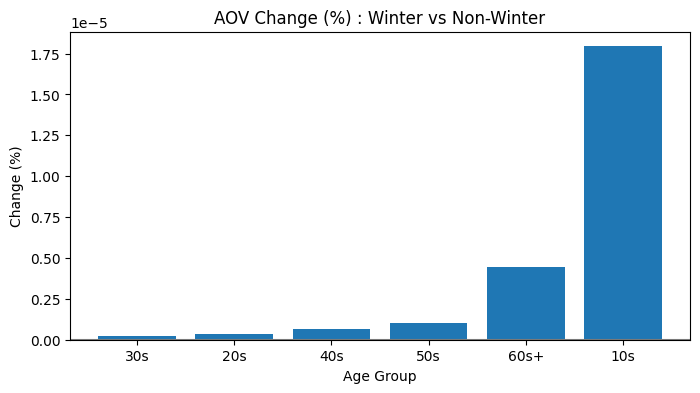

In [99]:
plt.figure(figsize=(8,4))
plt.bar(pivot_revenue_sorted.index, pivot_revenue_sorted["revenue_change_pct"])
plt.axhline(0, color="gray")
plt.title("AOV Change (%) : Winter vs Non-Winter")
plt.xlabel("Age Group")
plt.ylabel("Change (%)")
plt.show()

> 10대의 객단가 증가가 가장 큰 것처럼 보이지만, 애초에 y축 단위가 매우 작아서 유의미한지 잘 모르겠다 -> 애초에 정확한 단가가 아니라서 분석 불가

### 윈터시즌: 연령대별 고객 수

In [ ]:
customer_age = winter_df.groupby('Age_Group')['Customer_Id'].nunique()
customer_age.head()

Age_Group
10s     3164
20s    62947
30s    30160
40s    23382
50s    25649
Name: Customer_Id, dtype: int64

### 윈터시즌: 연령대별 주문 수 (행 개수 -> 주문 1건으로 간주)

In [ ]:
orders_age = winter_df.groupby('Age_Group').size()
orders_age

Age_Group
10s      3908
20s     94456
30s     48520
40s     36107
50s     38126
60s+    11093
Name: T_Dat, dtype: int64